In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from p1.kmeans import KMeans
from p2.tfidf import TFIDF

## 2D Gaussian

In [3]:
mu_1 = np.array([1, 0])
mu_2 = np.array([0, 1.5])
sigma_1 = np.array([[0.9, 0.4], [0.4, 0.9]])
sigma_2 = np.array([[0.9, 0.4], [0.4, 0.9]])

In [4]:
gaussian_1 = np.random.multivariate_normal(mu_1, sigma_1, 500)
gaussian_2 = np.random.multivariate_normal(mu_2, sigma_2, 500)

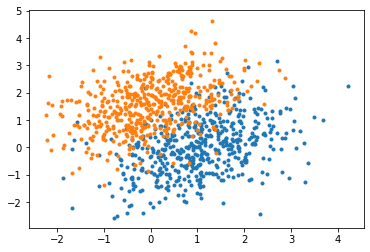

In [5]:
plt.scatter(gaussian_1[:, 0], gaussian_1[:, 1], marker='.')
plt.scatter(gaussian_2[:, 0], gaussian_2[:, 1], marker='.')

In [6]:
x = np.concatenate([gaussian_1, gaussian_2])

In [7]:
def plot_result(x, labels, k):
    for i in range(k):
        plt.scatter(x[labels == i][:, 0], x[labels == i][:, 1], marker='.')
    for center in model.centers:
        plt.scatter(center[0], center[1], c='k', marker='x')

## KMeans: 2 clusters w/o given centers

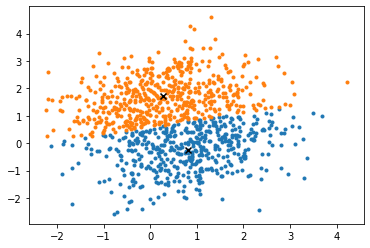

In [8]:
k = 2

model = KMeans(k)
centers, labels, n_iter = model.fit(x)

plot_result(x, labels, k)

## KMeans: 2 clusters w/ given centers

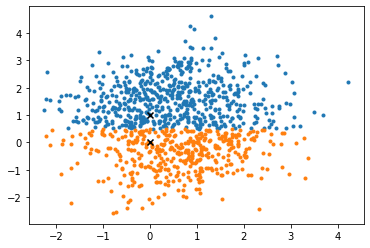

In [9]:
k = 2
c = ((10, 10), (-10, -10))

model = KMeans(k, c)
centers, labels, n_iter = model.fit(x)

plot_result(x, labels, k)

## KMeans: 4 clusters w/ given centers

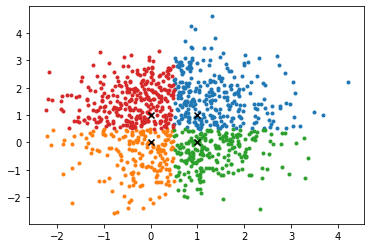

In [10]:
k = 4
c = ((10, 10), (-10, -10), (10, -10), (-10, 10))

model = KMeans(k, c)
centers, labels, n_iter = model.fit(x)

plot_result(x, labels, k)

## TD-IDF

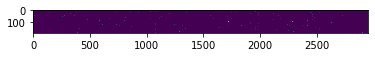

In [11]:
model = TFIDF()
tfidf = model.fit('p2/Amazon_Reviews.csv')

img = (tfidf / tfidf.max()) * 255
plt.imshow(img)

## 5 positive and 5 negative words

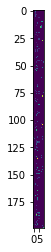

In [12]:
postive_words = ["amazing", "favourite", "best", "good", "great"]
negative_words = ["bad", "fake", "poor", "disappointed", "negative"]
selected = postive_words + negative_words
tfidf = model.fit('Amazon_Reviews.csv', selected)

img = (tfidf / tfidf.max()) * 255
plt.imshow(img)

## TF-IDF with KMeans

In [13]:
postive_vector = np.sum(tfidf[:, :5], axis=1, keepdims=True)
negative_vector = np.sum(tfidf[:, 5:], axis=1, keepdims=True)

docs_vector = np.concatenate((postive_vector, negative_vector), axis=1)

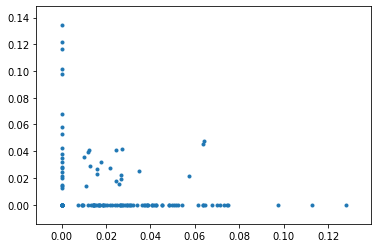

In [14]:
plt.scatter(docs_vector[:, 0], docs_vector[:, 1], marker='.')

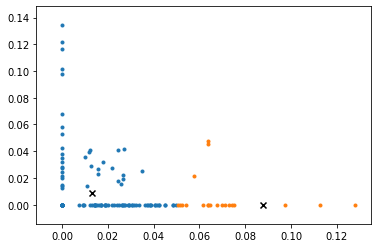

In [15]:
k = 2

model = KMeans(k)
centers, labels, n_iter = model.fit(docs_vector)

plot_result(docs_vector, labels, k)

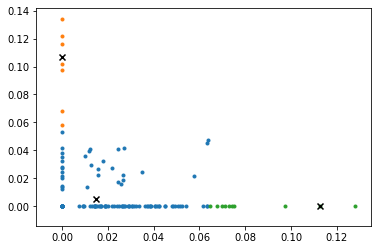

In [16]:
k = 3

model = KMeans(k)
centers, labels, n_iter = model.fit(docs_vector)

plot_result(docs_vector, labels, k)

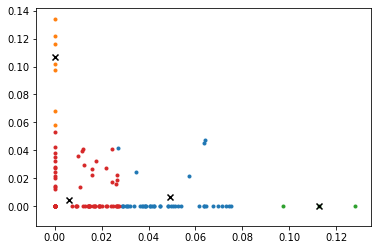

In [17]:
k = 4

model = KMeans(k)
centers, labels, n_iter = model.fit(docs_vector)

plot_result(docs_vector, labels, k)